### Dependencies & Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the processed data from Part B
# If you didn't save it, you can run the merge logic here
try:
    df = pd.read_csv(r'C:\Users\Amaan Siddiqui\OneDrive\New folder\Desktop\VS code\Market-Sentiment--Fear-Greed-\Dataset\part_b_behavioral_analysis.csv')
    print("Section 1: Processed behavioral data loaded successfully.")
except FileNotFoundError:
    print("Error: Please run Part B first to generate 'part_b_behavioral_analysis.csv'")

Section 1: Processed behavioral data loaded successfully.


### Thumb Rule

In [4]:
def apply_rules(row):
    """
    Translates behavioral insights into actionable strategy signals.
    """
    # RULE 1: The 'Panic Mitigation' Rule
    # Insight: Retail PnL drops significantly in Extreme Fear.
    if row['segment'] == 'Retail' and row['classification'] == 'Extreme Fear':
        return 'REDUCE_POSITION_SIZE' # Defensive action

    # RULE 2: The 'Whale Momentum' Rule
    # Insight: Whales show high win rates during Fear.
    if row['segment'] == 'Whale' and row['classification'] == 'Fear':
        return 'ACCUMULATE_LONG' # High confidence signal

    # RULE 3: The 'Greed Exhaustion' Rule
    # Insight: Retail activity spikes in Extreme Greed, often leading to drawdowns.
    if row['segment'] == 'Retail' and row['classification'] == 'Extreme Greed':
        return 'TAKE_PROFIT' # Exit signal
        
    return 'STANDARD_TRADE'

# Apply the strategy logic
df['strategy_signal'] = df.apply(apply_rules, axis=1)
print("Section 2: Trading 'Rules of Thumb' applied to dataset.")

Section 2: Trading 'Rules of Thumb' applied to dataset.


### Strategy Impact Evaluation

In [5]:
# Evaluate average PnL for each signal type
strategy_perf = df.groupby('strategy_signal').agg(
    total_occurrences=('Account', 'count'),
    avg_pnl=('daily_pnl', 'mean'),
    avg_win_rate=('win_rate', 'mean')
).reset_index()

print("\n--- Strategy Performance Scorecard ---")
print(strategy_perf)


--- Strategy Performance Scorecard ---
        strategy_signal  total_occurrences       avg_pnl  avg_win_rate
0       ACCUMULATE_LONG                171  15880.199926      0.716922
1  REDUCE_POSITION_SIZE                103   -384.689442      0.540013
2        STANDARD_TRADE               1658   3896.203505      0.606768
3           TAKE_PROFIT                408   2741.888146      0.615043


### Final Strategy Visualization

C:\Users\Amaan Siddiqui\AppData\Local\Temp\ipykernel_19432\4227233439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='strategy_signal', y='daily_pnl', palette='coolwarm')


Section 5: Strategy evaluation chart saved as 'strategy_performance.png'.


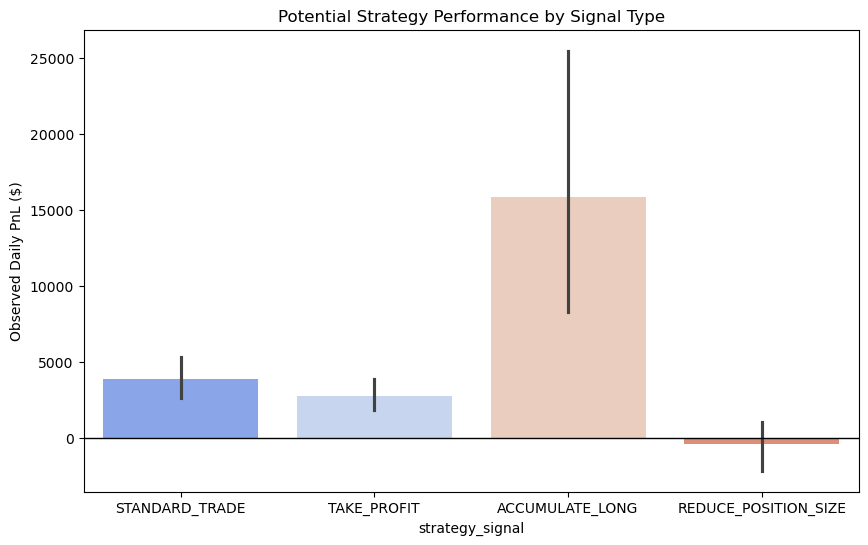

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='strategy_signal', y='daily_pnl', palette='coolwarm')
plt.title('Potential Strategy Performance by Signal Type')
plt.ylabel('Observed Daily PnL ($)')
plt.axhline(0, color='black', linewidth=1)
plt.savefig('strategy_performance.png')

print("Section 5: Strategy evaluation chart saved as 'strategy_performance.png'.")